In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_rows = 10

In [2]:
df = pd.read_csv("SPY.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
Date         252 non-null object
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Adj Close    252 non-null float64
Volume       252 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-06-04,274.529999,275.190002,274.260010,274.899994,269.668335,45385200
1,2018-06-05,275.049988,275.529999,274.179993,275.100006,269.864502,51135000
2,2018-06-06,275.790009,277.519989,275.089996,277.399994,272.120758,62732200
3,2018-06-07,277.950012,278.279999,276.339996,277.369995,272.091339,72969400
4,2018-06-08,276.850006,278.250000,276.660004,278.190002,272.895752,72139700


1) CREATE A PROGRAM WHICH PRODUCES AN OUTPUT TRIGGERED BY THE FOLLOWING LOGIC 
 USE OBJECT ORIENTED POROGRAMINGPROGRAM SO THAT THE CODE ONLY RUNS B) IF A) IS TRIGGERED
 <br> <br>
A)CURRENT TR <THAN 5 DAY AVG TR
 <br> <br>
B)DAILY % RETURN <THAN 5 DAY SMA DAILY RETURN 
    <br>
     TR= The true range indicator is taken as the greatest of the following: 
      <br>
      current high less the current low; 
      <br>
      the absolute value of the current high less the previous close; 
      <br>
      and the absolute value of the current low less the previous close.
    <br>
     AVG TR=The average true range is then a moving average, of the true ranges
 <br> <br>
2) HOW WOULD YOU OPTIMIZE n THE VALUES AS FOLLOWS?
    OPTIMIZE nDaysSMA and nDaysTR  BY HOW MANY HITS  IN nDaysRolling 
<br> <br>   
SMA =   Simple Moving Average


In [5]:
#Discover historical prices for SPY stock on Yahoo Finance
#In Object Oriented Programing
class YahooFinance:
    def __init__(self, zero, periods_back):
        self.zero = zero
        self.periods_back = periods_back
   
    def TR(self, df):
        df.index = pd.to_datetime(df.Date)
        df.sort_index(ascending = False, inplace = True)
        df.index.name= 'date_index'
        #This is to not get an error if the previous value is a NaN value
        df['previousClose']= df['Close'].shift(-1).astype(str).apply(lambda x: self.zero if x=='nan' else x).astype(float)
        
        df['param1'] = df['High']-df['Low']
        df['param2'] = abs(df['High']-df[df['previousClose'] > 0]['previousClose'])
        df['param3'] = abs(df['Low']-df[df['previousClose'] > 0]['previousClose'])
        df['TR'] = df[['param1', 'param2', 'param3']].max(axis=1)
        
        #just a trick for rolling mean
        df.sort_index(ascending = True, inplace = True)
        #Periods back according to what is we would like to be compared 
        df['previousfiveTR'] = df.TR.rolling(self.periods_back).mean().astype(str).apply(lambda x:self.zero if x=='nan' else x).astype(float)
        df.sort_index(ascending = False, inplace = True)
        
        df.fillna(self.zero, inplace = True)
        
        return df
    #CURRENT TR <THAN 5 DAY AVG TR
    def Current_TR(self, df):
        df['IndHigherAVRTR'] = np.nan
        for index in range(0,len(modi_df.index)-1):
            if (df.iloc[index:index+1,11].values < df.iloc[index:index+1,12].values):
                #DAILY % RETURN <THAN 5 DAY SMA DAILY RETURN  
                #According to what I understood I should trigger code B here
                #if the condition is met, but I didn't understand B requirement
                print ('Current TR: {} is lower than 5 days AVR TR: {}'.format(df.iloc[index:index+1,11].values, df.iloc[index:index+1,12].values))
                df.iloc[index:index+1,13] = 'N'
            else:
                df.iloc[index:index+1,13] = 'Y'
                print ('Current TR: {} is higher than 5 days AVR TR: {}'.format(df.iloc[index:index+1,11].values, df.iloc[index:index+1,12].values))
                pass
        return df
            
            
#HOW WOULD YOU OPTIMIZE n THE VALUES AS FOLLOWS?
 #OPTIMIZE nDaysSMA and nDaysTR  BY HOW MANY HITS  IN nDaysRollingI 
    
    #I did not undertood this "BY HOW MANY HITSIN nDaysRolling" I need explanation


In [6]:
vzero = 0
vperiods_back = 10
YF_object = YahooFinance(vzero, vperiods_back)

In [7]:
modi_df = YF_object.TR(df)

In [8]:
modi_df = YF_object.Current_TR(modi_df)

Current TR: [5.156189] is higher than 5 days AVR TR: [3.3836184]
Current TR: [3.459992] is higher than 5 days AVR TR: [3.1519991]
Current TR: [3.790009] is higher than 5 days AVR TR: [3.154001]
Current TR: [2.230011] is lower than 5 days AVR TR: [3.1899994]
Current TR: [3.440003] is higher than 5 days AVR TR: [3.4079987]
Current TR: [4.019989] is higher than 5 days AVR TR: [3.4880005]
Current TR: [2.110016] is lower than 5 days AVR TR: [3.9030029]
Current TR: [5.059998] is higher than 5 days AVR TR: [4.3560027]
Current TR: [1.589996] is lower than 5 days AVR TR: [4.273004]
Current TR: [2.979981] is lower than 5 days AVR TR: [4.3700042]
Current TR: [2.839996] is lower than 5 days AVR TR: [4.773007]
Current TR: [3.480011] is lower than 5 days AVR TR: [5.0020079]
Current TR: [4.149993] is lower than 5 days AVR TR: [4.9700071]
Current TR: [4.410004] is lower than 5 days AVR TR: [4.8730101]
Current TR: [4.240021] is lower than 5 days AVR TR: [4.7470121]
Current TR: [8.170013] is higher than

Current TR: [3.029999] is lower than 5 days AVR TR: [4.704001]
Current TR: [5.950012] is higher than 5 days AVR TR: [4.9990022]
Current TR: [5.660004] is higher than 5 days AVR TR: [4.6089998]
Current TR: [3.540009] is lower than 5 days AVR TR: [4.3089998]
Current TR: [6.529999] is higher than 5 days AVR TR: [4.5190004]
Current TR: [6.159973] is higher than 5 days AVR TR: [4.2010011]
Current TR: [4.079987] is lower than 5 days AVR TR: [4.131006]
Current TR: [5.77002] is higher than 5 days AVR TR: [4.2230073]
Current TR: [4.320007] is lower than 5 days AVR TR: [4.6860047]
Current TR: [2.] is lower than 5 days AVR TR: [5.1250031]
Current TR: [5.980011] is higher than 5 days AVR TR: [5.5740022]
Current TR: [2.049988] is lower than 5 days AVR TR: [5.8820009]
Current TR: [2.660004] is lower than 5 days AVR TR: [6.3170046]
Current TR: [5.640015] is lower than 5 days AVR TR: [6.3460023]
Current TR: [3.350006] is lower than 5 days AVR TR: [6.1649995]
Current TR: [5.460022] is lower than 5 days

In [9]:
modi_df

,Date,Open,High,Low,Close,Adj Close,Volume,previousClose,param1,param2,param3,TR,previousfiveTR,IndHigherAVRTR
date_index,,,,,,,,,,,,,,
2019-06-04,2019-06-04,277.119995,279.726196,276.619995,279.269989,279.269989,39663845,274.570007,3.106201,5.156189,2.049988,5.156189,3.383618,Y
2019-06-03,2019-06-03,275.309998,276.549988,273.089996,274.570007,274.570007,96253300,275.269989,3.459992,1.279999,2.179993,3.459992,3.151999,Y
2019-05-31,2019-05-31,276.200012,277.119995,275.239990,275.269989,275.269989,86862800,279.029999,1.880005,1.910004,3.790009,3.790009,3.154001,Y
2019-05-30,2019-05-30,279.109985,280.040009,277.809998,279.029999,279.029999,62523800,278.269989,2.230011,1.770020,0.459991,2.230011,3.189999,N
2019-05-29,2019-05-29,278.910004,279.359985,276.709991,278.269989,278.269989,104972900,280.149994,2.649994,0.790009,3.440003,3.440003,3.407999,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-08,2018-06-08,276.850006,278.250000,276.660004,278.190002,272.895752,72139700,277.369995,1.589996,0.880005,0.709991,1.589996,0.000000,Y
2018-06-07,2018-06-07,277.950012,278.279999,276.339996,277.369995,272.091339,72969400,277.399994,1.940003,0.880005,1.059998,1.940003,0.000000,Y
2018-06-06,2018-06-06,275.790009,277.519989,275.089996,277.399994,272.120758,62732200,275.100006,2.429993,2.419983,0.010010,2.429993,0.000000,Y


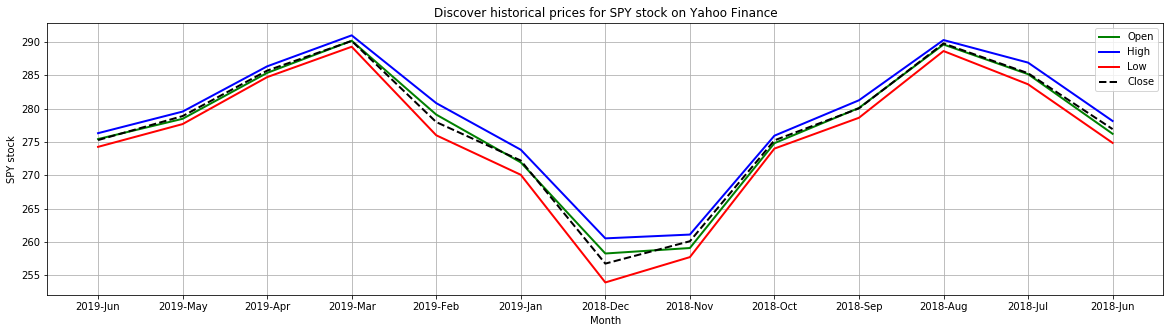

In [10]:
#Year and month in x axis 
x = modi_df.index.strftime('%Y-%b').unique().values
#Mean SPY stock
y1 = modi_df.resample('M').Open.mean().values
y2 = modi_df.resample('M').High.mean().values
y3 = modi_df.resample('M').Low.mean()
y4 = modi_df.resample('M').Close.mean()
plt.figure(figsize=(20,5))
plt.plot(x, y1, label = 'Open', linewidth = 2, color='green')
plt.plot(x, y2, label = 'High', linewidth = 2, color='blue')
plt.plot(x, y3, label = 'Low', linewidth = 2, color='red')
plt.plot(x, y4, label = 'Close', linewidth = 2, color='black', linestyle = '--')

plt.xlabel('Month')
plt.ylabel('SPY stock')
plt.title('Discover historical prices for SPY stock on Yahoo Finance')
plt.legend()
plt.grid()

In [11]:
modi_df.resample('M').Open.mean()

date_index
2018-06-30    275.428502
2018-07-31    278.466669
2018-08-31    285.351742
2018-09-30    290.168947
2018-10-31    279.096519
                 ...    
2019-02-28    274.811053
2019-03-31    280.095240
2019-04-30    289.606192
2019-05-31    285.160454
2019-06-30    276.214996
Freq: M, Name: Open, Length: 13, dtype: float64

In [12]:
modi_df.index.strftime('%Y-%b').unique().values

array(['2019-Jun', '2019-May', '2019-Apr', '2019-Mar', '2019-Feb',
       '2019-Jan', '2018-Dec', '2018-Nov', '2018-Oct', '2018-Sep',
       '2018-Aug', '2018-Jul', '2018-Jun'], dtype=object)